## Testing of K-Nearest Neighbors on Task B1

In [1]:
# Import libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Load one image and its size will be used later
img = cv2.imread('../Datasets/cartoon_set/img/0.png',cv2.IMREAD_GRAYSCALE)

In [9]:
#Read the csv. file
df = pd.read_csv('../Datasets/cartoon_set/labels.csv',sep='\t')
#In this task, only the 'face_shape' column is useful
y = np.array(df['face_shape'])[:1000]

In [7]:
#Initialization of sample matrix X
X = np.zeros((1000,img.size//16))
#Read each image in the folder, crop out 1/16 of the image with left ear, and save as a row of X
for i in range(1000):
    img = cv2.imread('../Datasets/cartoon_set/img/{}.png'.format(i),cv2.IMREAD_GRAYSCALE)
    img_compressed1 = img[img.shape[0]//2:3*img.shape[0]//4,img.shape[1]//4:img.shape[1]//2] #Cropping process
    X[i,:] = img_compressed1.reshape(1,img_compressed1.size)

In [10]:
#Training-validation split in a ratio 3:1
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [11]:
#Define a KNN classifier which trains the model based on training set and gives 
#a prediction on the test set
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model

    #Make a prediction with the trained model
    Y_pred = neigh.predict(X_test)
    return Y_pred

#Timer of the training process
time_start = time.time()
#Initialization of accuracy list
accuracy = np.zeros(20)
#Validation process of K-coefficient
for i in range (20):
    # Make a prediction with the gived K
    Y_pred=KNNClassifier(x_train, y_train, x_test,i+1)
    # Calculate the validation accuracy
    score=accuracy_score(y_test,Y_pred)
    # Store the result
    accuracy[i] = score

time_end = time.time()
running_time = time_end-time_start
print(f'finish training! total running time: {running_time}s')

finish training! total running time: 109.14022731781006s


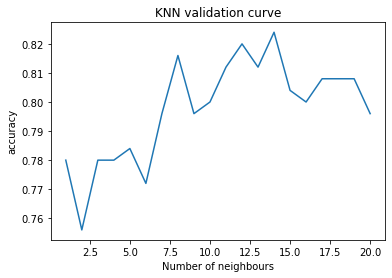

In [12]:
#Plot the validation curve with accuracy list against K-coefficient
plt.plot(np.linspace(1,20,20),accuracy)
plt.title('KNN validation curve')
plt.xlabel('Number of neighbours')
plt.ylabel('accuracy')

plt.show()